### DCF INTRINSIC VALUE CALCULATOR

Discounted Cash Flow is one of the most common way to value a stock. Discounted cash flow (DCF) is a method of valuation used to determine the value of an investment based on its return or future cash flows.

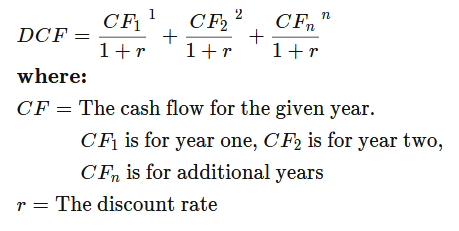

The aim of this project is to create a program that can calculate the intrinsic value of a stock. In this program we are going to create an intrinsic value based on 20 years of cash flow

*Disclaimer: All investment strategies and investments involve risk of loss. Nothing in this project and article constitutes professional and/or financial advice. Past performance are not guarantee of the future results.* 

Reference: 
- https://medium.datadriveninvestor.com/how-to-calculate-intrinsic-value-of-a-stock-aapl-case-study-935fb062004b
- yfinance module: https://pypi.org/project/yfinance/
- YahooFinancials module:https://pypi.org/project/yahoofinancials/



#### We will use Apple Stock as an example. Data is based on 9th Oct 2021.

<br />

#### Step 1: find out the free cash flow, total debt and the cash and short term investment of a compnay. These information are freely available on web

In [46]:
free_cash_flow = 94768000000
total_debt = 121.79e9
cash_short_term_investment = 61.7e9

#### Step 2: get the number of shares outstanding from Yahoo Finance. You need to install the yfinance module in order to use this module. 

https://pypi.org/project/yfinance/

In [47]:
import yfinance as yf
stock = yf.Ticker('AAPL')
share_outstanding = stock.info.get('sharesOutstanding')

#### Step 3: Determine the discount rate. The discount rate can be estimated according to the table below. 

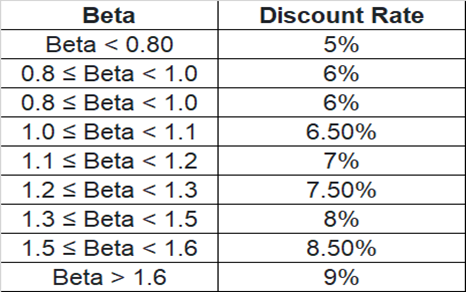

It can be automated by using the following code. Then calculate the discount factor from the discount rate

In [48]:
beta = stock.info['beta']

def discount_fac(beta):
    "This function returns the discount factor based on the beta"
    if beta < 0.8:
        discount_rate = 0.05
    elif 0.8 <= beta < 1.0:
        discount_rate = 0.06
    elif 1.0 <= beta < 1.1:
        discount_rate = 0.065
    elif 1.1 <= beta < 1.2:
        discount_rate = 0.07
    elif 1.2 <= beta < 1.3:
        discount_rate = 0.075
    elif 1.3 <= beta < 1.5:
        discount_rate = 0.08
    elif 1.5 <= beta < 1.6:
        discount_rate = 0.085
    else:
        discount_rate = 0.09
    
    discount_factor = 1/(1+discount_rate)
    return(discount_factor)

discount_factor = discount_fac(beta)
discount_factor

0.9302325581395349

#### Step 4: Estimate the cash flow growth of year 1 - 5, 6 - 10 and 11 - 20

<br />

- In this step, which is the most challenging step, is to make reasonable assumptions of growth of future cash flow of the company. This is a crucial part of the DCF analysis as the growth rate defined here can affect the accuracy of the valuation. Analyst must estimate the growth based on the past performance, future prospects, the sector of the company, macro-economic factor etc.

<br />

- We assume a growth rate of 20 % for the first 5 years, 10% for the following 5 years and 2 % for the final 10 years

In [49]:
#Growth rate of Cash flow from year 1 to 5
growth_1_mid = 0.20

#Growth rate of Cash flow from year 6 to 10
growth_2_mid = 0.10

#Growth rate of Cash flow from year 11 to 20
growth_3_mid = 0.02

It is good to add another 2 cases for a more consevertive case and a more optimistic case. Lets specify the upside and downside of the growth rate as per code below

In [50]:
#Growth rate of Cash flow from year 1 to 5 (Upside)
growth_1_up = 0.30

#Growth rate of Cash flow from year 6 to 10 (Upside)
growth_2_up = 0.15

#Growth rate of Cash flow from year 11 to 20 (Upside)
growth_3_up = 0.05

#Growth rate of Cash flow from year 1 to 5 (Downside)
growth_1_down = 0.10

#Growth rate of Cash flow from year 6 to 10 (Downside)
growth_2_down = 0.05

#Growth rate of Cash flow from year 11 to 20 (Downside)
growth_3_down = 0.01

#### Step 5: Create a function that return the total discounted cash flow. 

In [51]:
def total_dcf(free_cash_flow, 
            total_debt, 
            cash_short_term_investment, 
            discount_factor, 
            growth_1, 
            growth_2, 
            growth_3):
    "This function return the 20 years of total discounted cash flow"
    
    projected_cash_flow_list = []
    discounted_cash_flow_list = []
    growth_rate_1 = growth_1

    # Discounted cash flow of year 1 to 5
    for year in [1,2,3,4,5]:
        projected_cash_flow = free_cash_flow*((1+growth_rate_1)**year)
        discounted_cash_flow = projected_cash_flow*(discount_factor**year)
    
        projected_cash_flow_list.append(projected_cash_flow)
        discounted_cash_flow_list.append(discounted_cash_flow)

    #discounted cash flow of year 6 to 10
    projected_cash_flow_year5 = projected_cash_flow
    growth_rate_2 = growth_2

    for year in [6,7,8,9,10]:
        projected_cash_flow = projected_cash_flow_year5*((1+growth_rate_2)**(year-5))
        discounted_cash_flow = projected_cash_flow*(discount_factor**(year))
        projected_cash_flow_list.append(projected_cash_flow)
        discounted_cash_flow_list.append(discounted_cash_flow)

    #discounted cash flow of year 11 to 20
    projected_cash_flow_year10 = projected_cash_flow
    growth_rate_3 = growth_3

    for year in [11,12,13,14,15,16,17,18,19,20]:
    
        projected_cash_flow = projected_cash_flow_year10*((1+growth_rate_3)**(year-10))
        discounted_cash_flow = projected_cash_flow*(discount_factor**(year))
        projected_cash_flow_list.append(projected_cash_flow)
        discounted_cash_flow_list.append(discounted_cash_flow)
    
    return sum(discounted_cash_flow_list)

#### Step 6: Calculate the Intrinsic Value
- First, using the function created above to get the total discounted cash flow. 
- Then, take the total discounted cash flow, minus off the total debt, add total cash and short term investment, and divide it by the number of shares outstanding

In [52]:
growth_1 = growth_1_mid #growth for year 1 - 5
growth_2 = growth_2_mid #growth for year 6 - 10
growth_3 = growth_3_mid #growth for year 11 - 20

total_discounted_cash_flow = total_dcf(free_cash_flow, 
                                        total_debt, 
                                        cash_short_term_investment, 
                                        discount_factor, 
                                        growth_1, 
                                        growth_2, 
                                        growth_3)

intrinsic_value_mid = (total_discounted_cash_flow + cash_short_term_investment - total_debt) / share_outstanding
print("${:,.2f}".format(intrinsic_value_mid))

$174.44


Repeat the above code for the upside case and downside case

In [53]:
#Upside Case

growth_1 = growth_1_up #growth for year 1 - 5
growth_2 = growth_2_up #growth for year 6 - 10
growth_3 = growth_3_up #growth for year 11 - 20

total_discounted_cash_flow = total_dcf(free_cash_flow, 
                                        total_debt, 
                                        cash_short_term_investment, 
                                        discount_factor, 
                                        growth_1, 
                                        growth_2, 
                                        growth_3)

intrinsic_value_up = (total_discounted_cash_flow + cash_short_term_investment - total_debt) / share_outstanding
print("${:,.2f}".format(intrinsic_value_up))

#Downside Case

growth_1 = growth_1_down #growth for year 1 - 5
growth_2 = growth_2_down #growth for year 6 - 10
growth_3 = growth_3_down #growth for year 11 - 20

total_discounted_cash_flow = total_dcf(free_cash_flow, 
                                        total_debt, 
                                        cash_short_term_investment, 
                                        discount_factor, 
                                        growth_1, 
                                        growth_2, 
                                        growth_3)

intrinsic_value_down = (total_discounted_cash_flow + cash_short_term_investment - total_debt) / share_outstanding
print("${:,.2f}".format(intrinsic_value_down))

$323.02
$98.30


#### Step 7: Finally, compare the calculated intrinsic value against the current stock price.
- The following code extract the stock price from yahoo finance, compared against the calculated intrinsic value and print out a summary indicating whether the stock price is overvalued or undervalued. 

In [54]:
# Get current share price

from yahoofinancials import YahooFinancials
ticker = 'AAPL'
yahoo_financials = YahooFinancials(ticker)
stock_price = yahoo_financials.get_current_price()

# Label the intrinsic values as "overvalued" or "undervalued"
if intrinsic_value_up <= stock_price:
    valuation_up = 'Overvalued'
else:
    valuation_up = 'Undervalued'

if intrinsic_value_mid <= stock_price:
    valuation_mid = 'Overvalued'
else:
    valuation_mid = 'Undervalued'
    
if intrinsic_value_down <= stock_price:
    valuation_down = 'Overvalued'
else:
    valuation_down = 'Undervalued'

# Calculate the percentage difference between the current stock price and the intrinsic value of the stock
difference_up = ((stock_price - intrinsic_value_up) / stock_price)*100 #output in percentage, so need to x 100
difference_mid = ((stock_price - intrinsic_value_mid) / stock_price)*100 
difference_down = ((stock_price - intrinsic_value_down) / stock_price)*100

# Compile all information into a dictionary, and covert it to a pandas dataframe as a final output.
import pandas as pd

output_dict = {'Case': ['Upside', 'Middle', 'Downside'],
             'Current Share Price': [stock_price, stock_price, stock_price],
             'Intrinsic Value': [intrinsic_value_up, intrinsic_value_mid, intrinsic_value_down],
             'Percentage Difference': [difference_up, difference_mid, difference_down],
             'Valuation': [valuation_up, valuation_mid, valuation_down]}

output = pd.DataFrame(output_dict) #DataFrame constructor

def format(x):
    return "${:.1f}".format(x)

output['Current Share Price'] = output['Current Share Price'].apply(format)
output['Intrinsic Value'] = output['Intrinsic Value'].apply(format)

def format(x):
    return "{:.1f}%".format(x)

output['Percentage Difference'] = output['Percentage Difference'].apply(format)

output

,Case,Current Share Price,Intrinsic Value,Percentage Difference,Valuation
0,Upside,$141.8,$323.0,-127.7%,Undervalued
1,Middle,$141.8,$174.4,-23.0%,Undervalued
2,Downside,$141.8,$98.3,30.7%,Overvalued


**From the above calculation, we can conclude that the current share price is fairly valued as the middle case is 23% undervalued.**